In [1]:
import os
import pickle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
# resolve paths
output_dir = Path(os.getcwd()).parent / 'outputs'

# init
dfs = {
    'sae_version': [],
    'q': [],
    'label_type': [],
    'top_k': [],
    'depth': [],
    'max_accuracy': [],
}

# for each case
for sae_version in ('gated',):
    for q in (2, 3):
        for label_type in ('small', 'big'):
            for depth in (2, 3):
                for top_k in (1, 2, 5, 10, 20, 50):
                    accuracies_path = output_dir / f'synthetic_recovery/sae-{sae_version}_q{q}/{label_type}/top{top_k}/depth{depth}/accuracies.pkl'
                    with open(accuracies_path, 'rb') as fpi:
                        accuracies = pickle.load(fpi)
                    dfs['sae_version'].append(sae_version)
                    dfs['q'].append(q)
                    dfs['label_type'].append(label_type)
                    dfs['top_k'].append(top_k)
                    dfs['depth'].append(depth)
                    dfs['max_accuracy'].append(max(accuracies))

# create dataframe
dfs = pd.DataFrame(dfs)
dfs

,sae_version,q,label_type,top_k,depth,max_accuracy
0,gated,2,small,1,2,0.236000
1,gated,2,small,2,2,0.875333
2,gated,2,small,5,2,1.000000
3,gated,2,small,10,2,1.000000
4,gated,2,small,20,2,1.000000
5,gated,2,small,50,2,1.000000
6,gated,2,small,1,3,0.262667
7,gated,2,small,2,3,0.925333
8,gated,2,small,5,3,1.000000
9,gated,2,small,10,3,1.000000


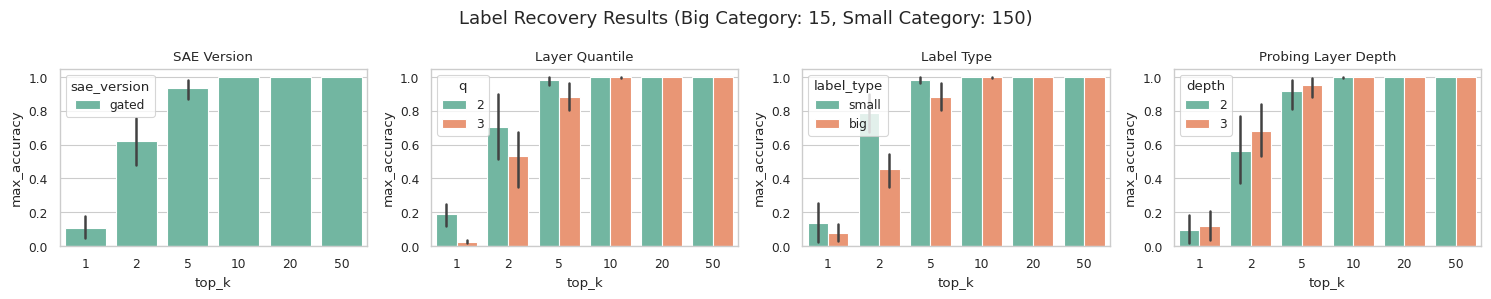

In [3]:
# resolve paths
asset_dir = Path(os.getcwd()).parent / 'assets'

# set style
sns.set_style('whitegrid')
sns.set_context('paper')

# create figure
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
fig.suptitle("Label Recovery Results (Big Category: 15, Small Category: 150)", fontsize=13)
for i in range(1, 4):
    axes[i].set_ylabel('')

# SAE Version
axes[0].set_title('SAE Version')
sns.barplot(
    data=dfs,
    x='top_k',
    y='max_accuracy',
    hue='sae_version',
    palette='Set2',
    ax=axes[0],
)
df = dfs[(dfs['sae_version'] == 'gated')]

# Layer Quantile
axes[1].set_title("Layer Quantile")
sns.barplot(
    data=df,
    x='top_k',
    y='max_accuracy',
    hue='q',
    palette='Set2',
    ax=axes[1],
    hue_order=sorted(df['q'].unique()),
)

# Label Type
axes[2].set_title("Label Type")
sns.barplot(
    data=df,
    x='top_k',
    y='max_accuracy',
    hue='label_type',
    palette='Set2',
    ax=axes[2],
)

# Probing Layer Depth
axes[3].set_title("Probing Layer Depth")
sns.barplot(
    data=df,
    x='top_k',
    y='max_accuracy',
    hue='depth',
    palette='Set2',
    ax=axes[3],
)

# save figure
plt.tight_layout()
plt.savefig(asset_dir / 'label_recovery_results.png', dpi=300)
plt.show()